<a href="https://colab.research.google.com/github/Josephmdlv/Final-work/blob/main/Democracy_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import requests
import pandas as pd
import os
from google.colab import files

def download_and_process_data(url):
  filename = os.path.basename(url)
  response = requests.get(url)

  with open(filename, 'wb') as file:
      file.write(response.content)

  df = pd.read_csv(filename)

  return df


df = download_and_process_data("https://raw.githubusercontent.com/Josephmdlv/Final-work/refs/heads/main/democracy-index.csv")
df

,Country,Year,Democracy score
0,Algeria,2006,3.17
1,Algeria,2008,3.32
2,Algeria,2010,3.44
3,Algeria,2011,3.44
4,Algeria,2012,3.83
...,...,...,...
331,Yemen,2019,1.95
332,Yemen,2020,1.95
333,Yemen,2021,1.95
334,Yemen,2022,1.95


In [8]:
df = df.pivot(index="Year", columns="Country", values="Democracy score")
df = df.sort_index().sort_index(axis=1)
df

Country,Algeria,Bahrain,Egypt,Iran,Iraq,Israel,Jordan,Kuwait,Lebanon,Libya,...,Oman,Palestine,Qatar,Saudi Arabia,Sudan,Syria,Tunisia,Turkey,United Arab Emirates,Yemen
Year,,,,,,,,,,,,,,,,,,,,,
2006,3.17,3.53,3.90,2.93,4.01,7.28,3.92,3.09,5.82,1.84,...,2.77,6.01,2.78,1.92,2.90,2.36,3.06,5.70,2.42,2.98
2008,3.32,3.38,3.89,2.83,4.00,7.48,3.93,3.39,5.62,2.00,...,2.98,5.83,2.92,1.90,2.81,2.18,2.96,5.69,2.60,2.95
2010,3.44,3.49,3.07,1.94,4.00,7.48,3.74,3.88,5.82,1.94,...,2.86,5.44,3.09,1.84,2.42,2.31,2.79,5.73,2.52,2.64
2011,3.44,2.92,3.95,1.98,4.03,7.53,3.89,3.74,5.32,3.55,...,3.26,4.97,3.18,1.77,2.38,1.99,5.53,5.73,2.58,2.57
2012,3.83,2.53,4.56,1.98,4.10,7.53,3.76,3.78,5.05,5.15,...,3.26,4.80,3.18,1.71,2.38,1.63,5.67,5.76,2.58,3.12
2013,3.83,2.87,3.27,1.98,4.10,7.53,3.76,3.78,5.05,4.82,...,3.26,4.80,3.18,1.82,2.54,1.86,5.76,5.63,2.52,2.79
2014,3.83,2.87,3.16,1.98,4.23,7.63,3.76,3.78,5.12,3.80,...,3.15,4.72,3.18,1.82,2.54,1.74,6.31,5.12,2.64,2.79
2015,3.95,2.79,3.18,2.16,4.08,7.77,3.86,3.85,4.86,2.25,...,3.04,4.57,3.18,1.93,2.37,1.43,6.72,5.12,2.75,2.24
2016,3.56,2.79,3.31,2.34,4.08,7.85,3.96,3.85,4.86,2.25,...,3.04,4.49,3.18,1.93,2.37,1.43,6.40,5.04,2.75,2.07


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape y to have the shape (number of years, number of countries)
y = df.dropna().values # No need to reshape here

# Create a LinearRegression model for each country
models = {}
for i in range(y.shape[1]):  # Iterate over columns (countries)
    x = df.dropna().index.values.reshape(-1, 1)
    yi = y[:, i].reshape(-1, 1)  # Get data for the current country
    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, yi) # Fit the model to the data for the current country
    models[df.columns[i]] = model  # Store the model with the country name as key


missing_years = np.array([2005, 2007, 2009]).reshape(-1, 1)

# Predict missing values for each country
for country in df.columns:
    model = models[country]  # Get the model for the current country
    missing_values = model.predict(poly.transform(missing_years))
    for year, value in zip(missing_years.flatten(), missing_values.flatten()):
        df.loc[year, country] = value

df.sort_index(inplace=True)
df

Country,Algeria,Bahrain,Egypt,Iran,Iraq,Israel,Jordan,Kuwait,Lebanon,Libya,...,Oman,Palestine,Qatar,Saudi Arabia,Sudan,Syria,Tunisia,Turkey,United Arab Emirates,Yemen
Year,,,,,,,,,,,,,,,,,,,,,
2005,3.046792,3.697033,3.982200,2.789705,3.685941,7.218017,3.678507,3.024266,5.846525,1.652579,...,2.811165,6.221984,2.891978,1.923687,2.853053,2.624435,1.359155,5.990168,2.470814,3.183978
2006,3.170000,3.530000,3.900000,2.930000,4.010000,7.280000,3.920000,3.090000,5.820000,1.840000,...,2.770000,6.010000,2.780000,1.920000,2.900000,2.360000,3.060000,5.700000,2.420000,2.980000
2007,3.262600,3.450893,3.876265,2.592678,3.930079,7.339144,3.807788,3.303757,5.738890,2.317678,...,2.915191,5.848692,2.930962,1.873275,2.738805,2.347636,2.840827,5.859697,2.493287,3.021328
2008,3.320000,3.380000,3.890000,2.830000,4.000000,7.480000,3.930000,3.390000,5.620000,2.000000,...,2.980000,5.830000,2.920000,1.900000,2.810000,2.180000,2.960000,5.690000,2.600000,2.950000
2009,3.440874,3.233605,3.764938,2.427894,4.094824,7.449260,3.892080,3.530325,5.593804,2.803394,...,2.998475,5.496844,2.979690,1.841646,2.636958,2.106244,4.069016,5.707810,2.523460,2.860475
2010,3.440000,3.490000,3.070000,1.940000,4.000000,7.480000,3.740000,3.880000,5.820000,1.940000,...,2.860000,5.440000,3.090000,1.840000,2.420000,2.310000,2.790000,5.730000,2.520000,2.640000
2011,3.440000,2.920000,3.950000,1.980000,4.030000,7.530000,3.890000,3.740000,5.320000,3.550000,...,3.260000,4.970000,3.180000,1.770000,2.380000,1.990000,5.530000,5.730000,2.580000,2.570000
2012,3.830000,2.530000,4.560000,1.980000,4.100000,7.530000,3.760000,3.780000,5.050000,5.150000,...,3.260000,4.800000,3.180000,1.710000,2.380000,1.630000,5.670000,5.760000,2.580000,3.120000
2013,3.830000,2.870000,3.270000,1.980000,4.100000,7.530000,3.760000,3.780000,5.050000,4.820000,...,3.260000,4.800000,3.180000,1.820000,2.540000,1.860000,5.760000,5.630000,2.520000,2.790000


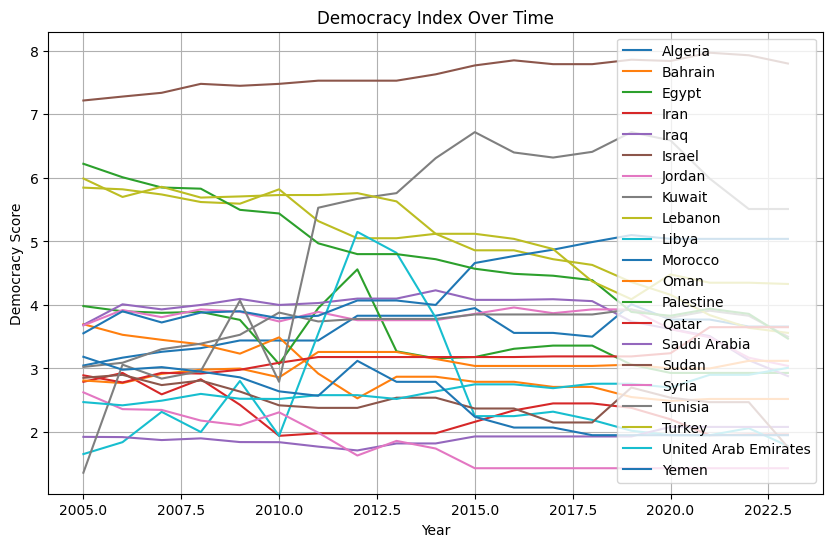

In [15]:
import matplotlib.pyplot as plt

df.plot(figsize=(10, 6))  # Adjust figsize as needed

plt.title('Democracy Index Over Time')
plt.xlabel('Year')
plt.ylabel('Democracy Score')
plt.legend(loc='best')  # Adjust legend location as needed
plt.grid(True)

plt.show()

In [18]:
df.to_csv("Democracy-Index_.csv")